# **Capítulo 03**

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [62]:
def pareto_diagram(data: dict[str, int]) -> None:
    order_data: dict[str, int] = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

    categories: list[str] = list(order_data.keys())
    values: list[int] = list(order_data.values())

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(y=categories, x=values, palette="coolwarm")

    for p in ax.patches:
        ax.text(
            p.get_width() + 0.5,
            p.get_y() + p.get_height()/2,
            f"{p.get_width()}",
            ha="left",
            va="center",
            fontsize=12,
            color="black"
        )

    plt.xlabel('Valores')
    plt.ylabel('Categorias')
    plt.title('Gráfico de Barras com Valores')
    plt.xlim(0, max(values) + 3)
    plt.show()

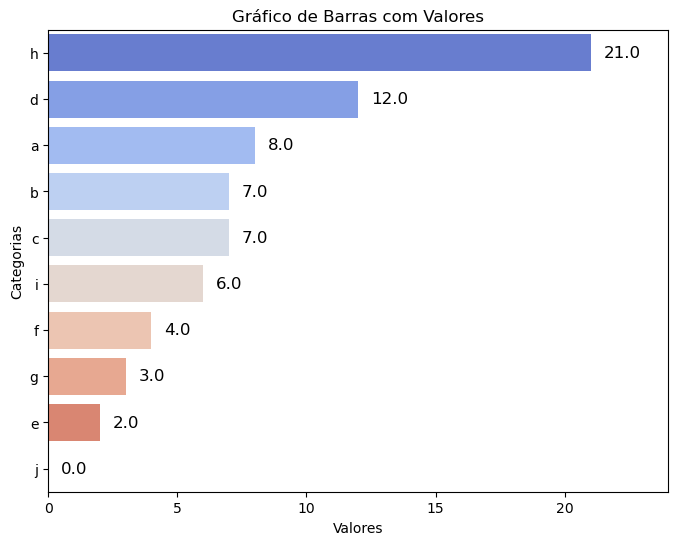

In [63]:
# Questão 01
# b)

# Frequências das respostas

data: dict[str, int] = {
    "a": 8, "b": 7, "c": 7, "d": 12, "e": 2, 
    "f": 4, "g": 3, "h": 21, "i": 6, "j": 0
}

# Diagrama de Pareto
pareto_diagram(data)

In [64]:
# Funções
def count_values(values: list[float], value_min: int, value_max: int) -> int:
    return sum(value_min <= value < value_max for value in values)

def frequency_table(sample_values: list[float], interval_class: int) -> dict[list[float]]:
    size_values: int = len(values)
    max_value: float = max(values)
    min_value: int = math.floor(min(values))
    class_table: list[tuple[int]] = []
    fr_table: dict[list[float]] = {}
    cumulative_relative_frequency: float = 0

    while min_value <= max_value:
        class_table.append((min_value, min_value + interval_class))
        min_value = min_value + interval_class
    
    for tuple_value in class_table:
        midpoint: float = (tuple_value[0] + tuple_value[1]) / 2
        frequency: int = count_values(sample_values, tuple_value[0], tuple_value[1])
        relative_frequency: float = round((frequency/size_values)*100, 2)
        cumulative_relative_frequency += round(relative_frequency, 2)
        fr_table[midpoint] = [frequency, relative_frequency, cumulative_relative_frequency]
    
    return fr_table

In [65]:
# Questão 02

values = [
    76.8, 74.3, 74.9, 77.0, 75.1,
    74.8, 74.0, 74.7, 74.4, 75.9,
    73.8, 74.4, 74.8, 76.8, 73.6,
    75.3, 73.4, 74.7, 73.4, 74.2,
    76.4, 73.2, 76.5, 75.6, 73.5,
    76.3, 74.1, 75.0, 76.0, 74.7,
    72.9, 72.9, 74.6, 75.0, 75.1,
    74.9, 74.5, 77.1, 74.6, 74.8,
    76.2, 74.7, 76.0, 75.8, 77.3,
    75.2, 77.5, 74.7, 73.3, 74.3
]

# a)
fr_dict: dict[float, list[float]] = frequency_table(values, 1)
fr_dict

{72.5: [2, 4.0, 4.0],
 73.5: [7, 14.0, 18.0],
 74.5: [20, 40.0, 58.0],
 75.5: [9, 18.0, 76.0],
 76.5: [8, 16.0, 92.0],
 77.5: [4, 8.0, 100.0]}

In [66]:
def transform_into_dataframe(fr_table: dict[float, list[float]]) -> pd.DataFrame:
    df = pd.DataFrame.from_dict(fr_table, orient="index", columns=['Frequencia', 'Freq. Relativa', 'Freq. Acumulada'])
    df.index.name="Classe"
    df.reset_index(inplace=True)
    return df

def histogram_chart(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Classe", y="Frequencia", data=df, color="royalblue", width=1)

    plt.xlabel("Classe (Intervalo de Valores)")
    plt.ylabel("Frequência")
    plt.title("Histograma de Frequências")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

def cumulative_distribution_graph(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(x='Classe', y='Freq. Acumulada', data=df, marker='o', color='royalblue', linewidth=2)

    plt.xlabel('Classe (Intervalo de Valores)', fontsize=14)
    plt.ylabel('Frequência Acumulada (%)', fontsize=14)
    plt.title('Gráfico de Distribuição Acumulada', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

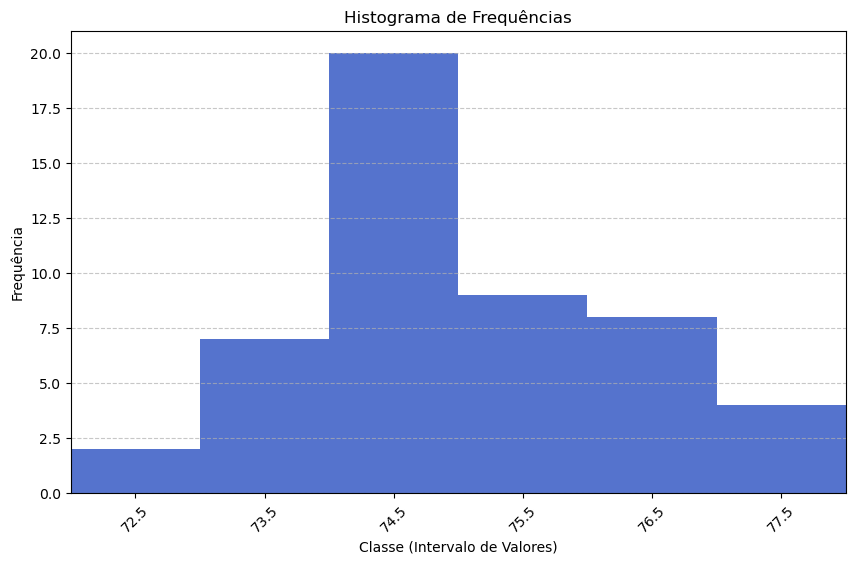

In [67]:
# b) Histograma
df: pd.DataFrame = transform_into_dataframe(fr_dict)
histogram_chart(df)


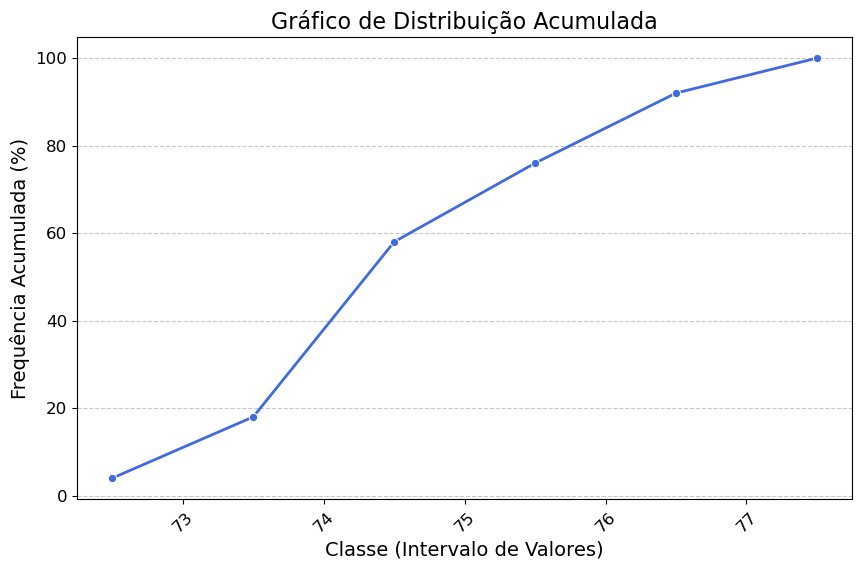

In [68]:
# d) Frequência Acumulada

cumulative_distribution_graph(df)

In [69]:
def mean_statistics(values: list[float]) -> float:
    sum_values: float  = sum(value for value in values)
    size_values: int = len(values)
    return round(sum_values / size_values, 2)

def variance_statistics(mean_value: float, values: list[float]) -> float:
    sum_of_squares: float = sum(math.pow(value - mean_value, 2) for value in values)
    degree_of_freedom: int = len(values) - 1
    return round(sum_of_squares / degree_of_freedom, 2)

def standard_deviation(variance: float) -> float:
    return round(math.sqrt(variance), 2)

In [70]:
# 03)
new_values: list[float] = [7, 8, 6, 10, 5, 9, 4, 12, 7, 8]

# a) mean
mean_result: float = mean_statistics(new_values)
print(f"Mean = {mean_result}")

# b) standard deviation
variance_result: float = variance_statistics(mean_result, new_values)
sd_resut: float = standard_deviation(variance_result)

print(f"Standard deviation = {sd_resut}")


Mean = 7.6
Standard deviation = 2.37


In [71]:
def mean_frequency(dict_frequency: dict[float, int]) -> float:
    multiply_values: float = sum(key * value for key, value in dict_frequency.items())
    total_sample: float = sum(value for value in dict_frequency.values())
    return round(multiply_values / total_sample, 2)

def variance_frequency(mean_value: float, values_dict: dict[float, int]) -> float:
    total_sample: int = sum(values_dict.values())
    sum_of_squares: float = sum(value * math.pow(key - mean_value, 2) for key, value in values_dict.items())
    degree_of_freedom: int = total_sample - 1
    return round(sum_of_squares / degree_of_freedom, 2)

In [72]:
# 04)
values_dict: dict[float, int] = {
    0: 30,
    1: 25,
    2: 10,
    3: 5,
    4: 2,
}


mean_result:float = mean_frequency(values_dict)
variance_result: float = variance_frequency(mean_result, values_dict)
sd_result: float = standard_deviation(variance_result)

print(f"Mean = {mean_result}")
print(f"Standard deviation = {sd_result}")

Mean = 0.94
Standard deviation = 1.05


In [73]:
def data_rolls(values_dict: dict[float, int]) -> list[int]:
    values_list: list[int] = []

    for value, frequency in values_dict.items():
        values_list.extend([value] * frequency)

    values_list.sort()

    return values_list

def median_statistic(values_dict: dict[float, int]) -> float:
    values_rol = data_rolls(values_dict)

    n: int = len(values_rol)
    middle: float = n // 2

    if n % 2 == 0:
        median: float = (values_rol[middle - 1] + values_rol[middle]) / 2
    else:
        median: float = values_rol[middle]

    return median

def first_quartile(values_dict: dict[float, int]) -> float:
    values_rol = data_rolls(values_dict)

    n = len(values_rol)

    q1_index = n // 4

    if n % 4 == 0:
        q1  = (values_rol[q1_index - 1] + values_rol[q1_index]) / 2
    else:
        q1 = values_rol[q1_index]

    return q1

def third_quartile(values_dict: dict[float, int]) -> float:
    values_rol = data_rolls(values_dict)

    n = len(values_rol)

    q3_index = 3*n // 4

    if (3*n) % 4 == 0:
        q3  = (values_rol[q3_index - 1] + values_rol[q3_index]) / 2
    else:
        q3 = values_rol[q3_index]

    return q3

In [75]:
# {72.5: [2, 4.0, 4.0],
#  73.5: [7, 14.0, 18.0],
#  74.5: [20, 40.0, 58.0],
#  75.5: [9, 18.0, 76.0],
#  76.5: [8, 16.0, 92.0],
#  77.5: [4, 8.0, 100.0]}

values_dict = {
    72.5: 2,
    73.5: 7,
    74.5: 20,
    75.5: 9,
    76.5: 8,
    77.5: 4
    }

median_value = median_statistic(values_dict)
q1 = first_quartile(values_dict)
q3 = third_quartile(values_dict)

print(f"Mediana = {median_value}")
print(f"Q1 = {q1}")
print(f"Q2 = {q3}")

Mediana = 74.5
Q1 = 74.5
Q2 = 75.5
